In [33]:
from tinydb import TinyDB, Query, where
from matplotlib import pyplot as plt
import pandas as pd

# load database and collections
db = TinyDB('../db.json')
db_tests = db.table('tests')
db_tests_meta = db.table('tests_meta')
user = Query()

VIDEO_NAME = 'V_20210217_180800_N0'

In [50]:
[db_tests_meta.search(user.test_id != '')[0]][0].keys()

dict_keys(['test_id', 'video_file_name', 'datetime', 'fps', 'athlete', 'blink_threshold', 'bf_timestep'])

In [51]:
[db_tests.search(user.test_id != '')[0]][0].keys()

dict_keys(['test_id', 'frame', 'blink', 'total_acc_blinks', 'ear_left', 'ear_right', 'gaze_direction', 'blink_freq', 'blink_duration', 'yaw', 'pitch', 'roll'])

In [40]:
ids = [(i['test_id'], i['video_file_name'], ) for i in db_tests_meta.search(user.athlete == 'LeoMayer')]
ids

[('17f28e42e48e4df1a51216e80e49edbd', 'V_20210217_180800_N0')]

In [7]:
data_y = [float(i['pitch']) for i in db_tests.search(user.test_id == ids[1])]
data_x = [float(i) for i in range(len(data_y))]

data = pd.DataFrame({'frames':data_x, 'pos':data_y}).rolling(30).median()

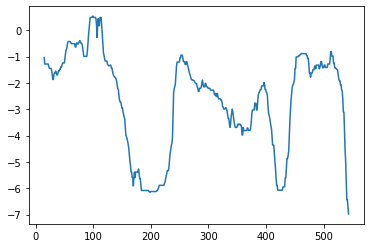

In [8]:
plt.plot(data['frames'], data['pos'])
plt.show()

In [105]:
pd.DataFrame([i for i in db_tests.search(user.test_id == test_id)])

,test_id,frame,blink,total_acc_blinks,ear_left,ear_right,gaze_direction,blink_freq,blink_duration,yaw,pitch,roll
0,17f28e42e48e4df1a51216e80e49edbd,1,False,0,2.9,3.2,Looking center,0,0.0,-6.78,1.12,4.39
1,17f28e42e48e4df1a51216e80e49edbd,2,False,0,3.0,3.0,Looking center,0,0.0,-3.9,-1.96,3.6
2,17f28e42e48e4df1a51216e80e49edbd,3,False,0,3.0,2.9,Looking center,0,0.0,-6.62,0.22,4.55
3,17f28e42e48e4df1a51216e80e49edbd,4,False,0,2.8,3.0,Looking center,0,0.0,-10.83,-0.82,4.04
4,17f28e42e48e4df1a51216e80e49edbd,5,False,0,2.7,3.0,Looking center,0,0.0,-9.44,-0.44,2.9
...,...,...,...,...,...,...,...,...,...,...,...,...
554,17f28e42e48e4df1a51216e80e49edbd,555,False,19,2.6,3.0,Looking center,13,0.0,9.16,-6.39,-2.12
555,17f28e42e48e4df1a51216e80e49edbd,556,False,19,3.2,3.5,Looking center,13,0.0,9.31,-7.97,-2.94
556,17f28e42e48e4df1a51216e80e49edbd,557,False,19,2.9,3.0,Looking center,13,0.0,10.69,-6.38,-2.86
557,17f28e42e48e4df1a51216e80e49edbd,558,False,19,3.7,3.7,Looking center,13,0.0,10.07,-9.99,-1.34
